In [1]:
# Import libraries
import os
import sqlalchemy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
from matplotlib.dates import date2num

from sqlalchemy.inspection import inspect

In [2]:
importlib.reload(plt)

<module 'matplotlib.pyplot' from 'c:\\Users\\Edrick\\PycharmProjects\\pythonProject\\twse_sq_scraper\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [3]:
# Test cell
os.getcwd()

'c:\\Users\\Edrick\\PycharmProjects\\pythonProject\\twse_sq_scraper\\main'

In [4]:
# Load the database
engine = sqlalchemy.create_engine('sqlite:///../data/TWSE_SQ.db')
inspector = inspect(engine)
inspector.get_table_names()

['temp', 'twse_sq']

In [5]:
# Import the database table
df = pd.read_sql('twse_sq', engine)
df = df.query('request_date > "2022-11-28"')
df.head()

,request_date,request_time,stkno,txtime,slblimit,ts
10322,2022-11-29,08:53:12.717576,0050,08:46:18.94,430,8461894
10323,2022-11-29,08:53:12.717576,0051,,4215,0
10324,2022-11-29,08:53:12.717576,0052,,37004,0
10325,2022-11-29,08:53:12.717576,0053,,885,0
10326,2022-11-29,08:53:12.717576,0055,,26329,0


In [32]:
print(df.columns)
df.tail()

Index(['request_date', 'request_time', 'stkno', 'txtime', 'slblimit', 'ts'], dtype='object')


,request_date,request_time,stkno,txtime,slblimit,ts
126587,2022-12-02,13:31:55.059995,9917,13:30:30.90,2477,13303090
126588,2022-12-02,13:32:44.173073,1101,13:31:41.65,27164,13314165
126589,2022-12-02,13:32:44.173073,2886,13:31:42.53,54368,13314253
126590,2022-12-02,14:01:40.240232,9921,14:01:11.66,123,14011166
126591,2022-12-02,15:28:40.846469,3617,15:28:03.03,53363,15280303


In [10]:
# Generate the stock list
df['stkno'].to_clipboard()

In [36]:
# Some basic information, looking at the dataset
print("Number of days: ", len(df['request_date'].unique()))
print("Number of stocks: ", len(df['stkno'].unique()))

Number of days:  5
Number of stocks:  1766


In [107]:
df.query("request_date <= @end_date ")

,request_date,request_time,stkno,txtime,slblimit,ts
10322,2022-11-29,08:53:12.717576,0050,08:46:18.94,430,8461894
10323,2022-11-29,08:53:12.717576,0051,,4215,0
10324,2022-11-29,08:53:12.717576,0052,,37004,0
10325,2022-11-29,08:53:12.717576,0053,,885,0
10326,2022-11-29,08:53:12.717576,0055,,26329,0
...,...,...,...,...,...,...
126587,2022-12-02,13:31:55.059995,9917,13:30:30.90,2477,13303090
126588,2022-12-02,13:32:44.173073,1101,13:31:41.65,27164,13314165
126589,2022-12-02,13:32:44.173073,2886,13:31:42.53,54368,13314253
126590,2022-12-02,14:01:40.240232,9921,14:01:11.66,123,14011166


In [6]:
# Utility functions
def get_data(stkno_list:list, start_date, end_date, data):
    return data.query("request_date <= @end_date & request_date >= @start_date & stkno in @stkno_list")

In [108]:
start_date = '2022-11-28'
end_date = '2022-12-02'
stkno_list = ['0050', '2330']
df_temp = get_data(stkno_list=stkno_list, start_date=start_date, end_date=end_date)
df_temp.tail(10)

,request_date,request_time,stkno,txtime,slblimit,ts
123023,2022-12-02,13:02:33.334021,2330,13:02:16.78,3852144,13021678
123324,2022-12-02,13:03:42.023955,2330,13:03:00.45,3819144,13030045
123906,2022-12-02,13:08:38.260506,2330,13:07:28.50,3817144,13072850
124301,2022-12-02,13:13:43.851548,2330,13:13:24.43,3816144,13132443
124466,2022-12-02,13:15:32.968316,2330,13:15:00.04,3816144,13150004
125134,2022-12-02,13:22:35.802867,2330,13:22:15.33,3792144,13221533
125325,2022-12-02,13:22:56.029038,2330,13:22:24.57,3792144,13222457
125488,2022-12-02,13:23:41.660845,2330,13:23:15.58,3732144,13231558
125824,2022-12-02,13:25:32.229691,2330,13:25:20.65,3731144,13252065
126186,2022-12-02,13:30:33.101219,2330,13:29:59.50,3631144,13295950


In [7]:
def get_quota_used(stkno_list):
    df_stk = df.query('stkno in @stkno_list')
    return df_stk.groupby(['request_date', 'stkno']).apply(lambda x: (x['slblimit'].iloc[-1]/x['slblimit'].iloc[0]-1))

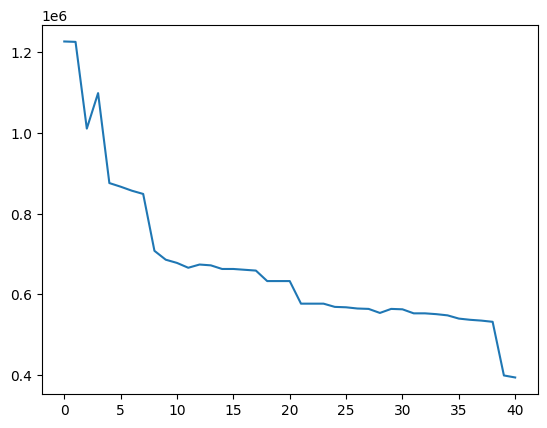

In [304]:
# Plotting the stock quota
start_date = '2022-12-02'
end_date = '2022-12-02'
stkno_list = ['1513']
df_temp = get_data(stkno_list=stkno_list, start_date=start_date, end_date=end_date)
plt.plot(range(len(df_temp['slblimit'])), df_temp['slblimit'])

Thigns to test with:
1. Calculate a table showing every stock daily used short quota
2. Calculate the velocity of short quota usages
3. Hourly burn of quota

In [109]:
# Calculating stock daily use of quota
for gp in df.groupby(['stkno', 'request_date']):
    print(gp)
    break

(('0050', Timestamp('2022-11-29 00:00:00')),       request_date     request_time stkno       txtime  slblimit        ts
10322   2022-11-29  08:53:12.717576  0050  08:46:18.94       430   8461894
38931   2022-11-29  13:28:40.712057  0050  13:27:56.92    241430  13275692)


In [110]:
# This line can see the use of quota each date
df_sq_group = df.groupby(['stkno', 'request_date'])
df_sq_diff = df_sq_group.apply(lambda gp: gp['slblimit'].iloc[0]-gp['slblimit'].iloc[-1])
df_sq_diff

stkno  request_date
0050   2022-11-29      -241000
       2022-11-30      -566000
       2022-12-01       503000
       2022-12-02      1367000
0051   2022-11-29            0
                        ...   
9960   2022-12-02            0
9962   2022-11-29            0
       2022-11-30            0
       2022-12-01            0
       2022-12-02            0
Length: 7062, dtype: int64

In [126]:
# Most changed in daily aggregated short quota in past 4 days
df_sq_diff.groupby('stkno').apply(lambda x: x.abs().mean()).sort_values(ascending=False).head(10)

stkno
00632R    10636500.0
2609       3927750.0
0056       3289750.0
2303       2680750.0
2883       2606000.0
3481       2272250.0
00878      2251750.0
2317       2145500.0
1101       2043750.0
2409       1892250.0
dtype: float64

In [139]:
# Most active stocks in security lending selling and buying in the past 4 days (most transactions)
df_sq_group['slblimit'].count().groupby('stkno').mean().sort_values(ascending=False).head(10)

stkno
2609      222.25
00878     199.25
006208    195.50
00636     190.25
4123      186.50
00655L    182.25
2303      179.25
2317      176.25
2610      167.75
6180      162.00
Name: slblimit, dtype: float64

In [ ]:
# Most changed in daily aggregated short quota in past 4 days
df_sq_diff.groupby('stkno').apply(lambda x: x.abs().mean()).sort_values(ascending=False).head(10)

In [161]:
# Overall volume transacted for all stocks on each date
df_sq_tx_diff = df_sq_group.apply(lambda x: x['slblimit'].diff()).dropna()
df_sq_tx_diff=df_sq_tx_diff.droplevel(2)

In [195]:
df_date_used_quota_overall = df.groupby(['request_date', 'stkno']).apply(lambda x: x['slblimit'].iloc[0] - x['slblimit'].iloc[-1]).groupby('request_date').sum()
df_date_used_quota_overall.to_clipboard()
df_date_used_quota_overall

request_date
2022-11-29     94523000
2022-11-30     89981000
2022-12-01    131338000
2022-12-02    105193000
dtype: int64

In [17]:
df_valid_rows = df.groupby(['request_date', 'stkno']).apply(lambda x: x['txtime'].iloc[0] == "")
df_valid_rows_idx = df_valid_rows[df_valid_rows].index
df_valid_rows_idx

MultiIndex([('2022-11-29',   '0051'),
            ('2022-11-29',   '0052'),
            ('2022-11-29',   '0053'),
            ('2022-11-29',   '0055'),
            ('2022-11-29',   '0056'),
            ('2022-11-29',   '0057'),
            ('2022-11-29',   '0061'),
            ('2022-11-29', '006201'),
            ('2022-11-29', '006203'),
            ('2022-11-29', '006204'),
            ...
            ('2022-12-02',   '9942'),
            ('2022-12-02',   '9943'),
            ('2022-12-02',   '9944'),
            ('2022-12-02',   '9945'),
            ('2022-12-02',   '9946'),
            ('2022-12-02',   '9951'),
            ('2022-12-02',   '9955'),
            ('2022-12-02',   '9958'),
            ('2022-12-02',   '9960'),
            ('2022-12-02',   '9962')],
           names=['request_date', 'stkno'], length=5761)

In [245]:
# Quota consumption of popular stocks in each date
df_daily_sq_change = df.groupby(['request_date', 'stkno']).apply(lambda x: (x['slblimit'].iloc[-1]/x['slblimit'].iloc[0]-1))
df_daily_sq_change

request_date  stkno
2022-11-29    0050     560.465116
              0051       0.000000
              0052      -0.324289
              0053       0.000000
              0055       0.000000
                          ...    
2022-12-02    9951       0.000000
              9955      -0.113074
              9958      -0.232524
              9960       0.000000
              9962       0.000000
Length: 7062, dtype: float64

In [253]:
df_daily_sq_change[df_valid_rows_idx].groupby('stkno').mean()

stkno
0050   -0.929530
0051    0.000000
0052   -0.108096
0053    0.000000
0055    0.000000
          ...   
9951    0.000000
9955   -0.028269
9958   -0.304243
9960    0.000000
9962    0.000000
Length: 1637, dtype: float64

In [317]:
df_daily_sq_change.groupby('stkno').mean().sort_values().head(50)
# df_daily_sq_change[df_valid_rows_idx].groupby('stkno').mean().sort_values().head(50)

stkno
0056     -0.999915
2486     -0.998965
3034     -0.997999
2441     -0.997992
6505     -0.996799
3576     -0.995326
2356     -0.994031
1455     -0.993834
8926     -0.993087
1314     -0.991795
2609     -0.991640
2006     -0.987789
3036     -0.987376
00900    -0.987099
1303     -0.984046
2539     -0.983970
2881     -0.983771
1304     -0.982072
1718     -0.979053
2412     -0.976264
1101     -0.973760
2906     -0.973121
2886     -0.972974
5876     -0.972428
9921     -0.967746
4916     -0.966846
5880     -0.961376
1717     -0.953382
1210     -0.949491
1785     -0.934037
5607     -0.932874
9908     -0.931649
2885     -0.931199
00679B   -0.912166
2227     -0.891056
1712     -0.890186
2548     -0.886464
2417     -0.882278
6277     -0.875125
1440     -0.874582
4137     -0.864761
9917     -0.860358
3045     -0.843426
2354     -0.842446
2385     -0.835631
3704     -0.830263
2489     -0.824092
6672     -0.821111
6233     -0.820543
3049     -0.819552
dtype: float64

In [312]:
# Stocks' average number of transaction
df.groupby(['request_date','stkno']).apply(lambda x: x['slblimit'].count()).groupby('stkno').mean().sort_values(ascending=False).head(50)

In [298]:
df.groupby(['request_date','stkno']).apply(lambda x: (x['slblimit'].diff().abs()>0).sum())[df_valid_rows_idx].groupby('stkno').mean().sort_values(ascending=False).head(50)

stkno
00878     188.000000
1513      151.000000
2530      121.000000
3481      119.500000
8069      110.500000
1712      101.000000
4919       97.000000
2027       95.000000
2637       92.000000
1444       88.000000
4128       86.666667
8926       85.000000
2481       84.333333
3062       84.000000
2408       83.000000
9945       82.666667
2888       78.500000
1802       77.000000
1312       77.000000
00692      76.000000
0056       75.500000
4915       74.000000
4164       70.000000
8454       70.000000
1304       69.000000
1467       68.666667
4927       68.333333
2388       67.000000
6213       67.000000
2606       66.000000
0052       65.666667
5607       64.000000
1609       63.333333
1722       63.000000
2201       61.000000
2615       61.000000
9958       60.333333
2383       60.000000
00632R     57.000000
3704       56.333333
2455       54.500000
2883       54.000000
2603       54.000000
8081       54.000000
2354       53.000000
8299       52.666667
2915       51.000000
2313   

In [79]:
# Which hour is the busiest hour?
# Calculate the quota usage in every hour
# Calculate the diff, then sum the abs diff within each hour
get_data(['0051'], '2022-11-29', '2022-12-02', df)

,request_date,request_time,stkno,txtime,slblimit,ts
10323,2022-11-29,08:53:12.717576,0051,,4215,0
39165,2022-11-30,09:08:30.652226,0051,,4220,0
66268,2022-12-01,08:55:23.221537,0051,,4495,0
96907,2022-12-02,08:51:11.240436,0051,,4568,0


In [8]:
hour_list = [f'{"0"*(1-(hour)//10)}{hour}:00:00.00' for hour in range(8, 17)]
hour_list

['08:00:00.00',
 '09:00:00.00',
 '10:00:00.00',
 '11:00:00.00',
 '12:00:00.00',
 '13:00:00.00',
 '14:00:00.00',
 '15:00:00.00',
 '16:00:00.00']

In [9]:
date_vol = {}
for date in df['request_date'].unique():
    df_hour = df.query("request_date == @date")
    date_vol[date] = {}
    for i in range(len(hour_list)-1):
        start_time = hour_list[i]
        end_time = hour_list[i+1]
        total_turnover = df_hour.query("txtime >= @start_time & txtime < @end_time")['slblimit'].diff().abs().sum()
        date_vol[date][end_time] = total_turnover
        # print(start_time, '-', end_time, total_turnover)
        # print('-'*50)

In [10]:
df_total_turnover = pd.DataFrame.from_dict(date_vol).mean(axis=1)

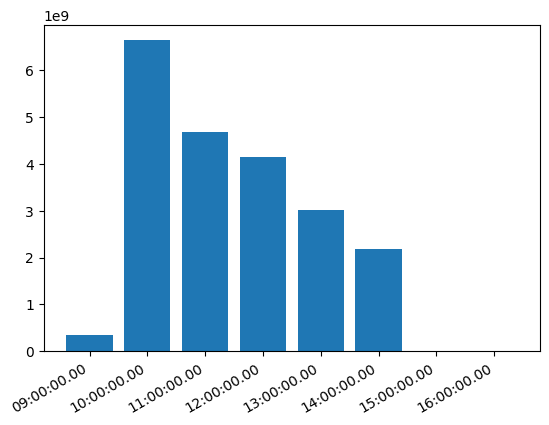

In [13]:
plt.bar(df_total_turnover.index, df_total_turnover)
plt.gcf().autofmt_xdate()

In [22]:
# Overall % of quota used in each hour
df_pct_hour = df.copy()
df_pct_hour = df_pct_hour.sort_values(['request_date', 'stkno'])
df_pct_hour['pct_of_open'] = df.groupby(['request_date', 'stkno']).apply(lambda x: x['slblimit'] / x['slblimit'].iloc[0]).values

In [23]:
df_pct_hour

,request_date,request_time,stkno,txtime,slblimit,ts,pct_of_open
10322,2022-11-29,08:53:12.717576,0050,08:46:18.94,430,8461894,1.000000
38931,2022-11-29,13:28:40.712057,0050,13:27:56.92,241430,13275692,561.465116
10323,2022-11-29,08:53:12.717576,0051,,4215,0,1.000000
10324,2022-11-29,08:53:12.717576,0052,,37004,0,1.000000
12272,2022-11-29,09:00:25.390449,0052,08:59:59.65,37004,8595965,1.000000
...,...,...,...,...,...,...,...
123790,2022-12-02,13:06:37.482952,9958,13:05:26.72,297855,13052672,0.805329
125308,2022-12-02,13:22:35.802867,9958,13:22:11.34,284855,13221134,0.770180
126426,2022-12-02,13:30:33.101219,9958,13:29:59.81,283855,13295981,0.767476
98670,2022-12-02,08:51:11.240436,9960,,7636,0,1.000000


In [24]:
df_pct_hour_wf_invalid = df_pct_hour.copy()
df_pct_hour = df_pct_hour.set_index(['request_date', 'stkno']).loc[df_valid_rows_idx]
df_pct_hour = df_pct_hour.reset_index()
df_pct_hour

,request_date,stkno,request_time,txtime,slblimit,ts,pct_of_open
0,2022-11-29,0051,08:53:12.717576,,4215,0,1.000000
1,2022-11-29,0052,08:53:12.717576,,37004,0,1.000000
2,2022-11-29,0052,09:00:25.390449,08:59:59.65,37004,8595965,1.000000
3,2022-11-29,0052,09:01:28.784991,09:01:05.74,29004,9010574,0.783807
4,2022-11-29,0052,09:02:26.160528,09:01:51.67,25004,9015167,0.675711
...,...,...,...,...,...,...,...
58555,2022-12-02,9958,13:06:37.482952,13:05:26.72,297855,13052672,0.805329
58556,2022-12-02,9958,13:22:35.802867,13:22:11.34,284855,13221134,0.770180
58557,2022-12-02,9958,13:30:33.101219,13:29:59.81,283855,13295981,0.767476
58558,2022-12-02,9960,08:51:11.240436,,7636,0,1.000000


In [74]:
start_time = '11:00:00.00'
end_time = '12:00:00.00'
df_hour.query("txtime >= @start_time & txtime < @end_time & stkno == @stk").tail(1).empty

True

In [25]:
# Calculating % of quota used in every hour
date_vol_pct = {}
for date in df_pct_hour['request_date'].unique():
    df_hour = df_pct_hour.query("request_date == @date")
    date_vol_pct[date] = {}
    for i in range(len(hour_list)-1):
        start_time = hour_list[i]
        end_time = hour_list[i+1]
        hour_stk_pct_dict = {}
        for stk in df_pct_hour['stkno'].unique():
            df_temp = df_hour.query("txtime >= @start_time & txtime < @end_time & stkno == @stk")
            if df_temp.empty:
                df_temp = df_hour.query("txtime < @end_time & stkno == @stk")
            if not df_temp.empty:
                hour_stk_pct_dict[stk] = df_temp.iloc[-1]['pct_of_open']
        date_vol_pct[date][end_time] = np.array(list(hour_stk_pct_dict.values())).mean()
        # print(date, start_time, end_time, date_vol_pct[date][end_time])

KeyboardInterrupt: 

In [ ]:
pd.DataFrame.from_dict(date_vol_pct)

{numpy.datetime64('2022-11-29T00:00:00.000000000'): {'09:00:00.00': 0.9978793692009597,
  '10:00:00.00': 0.9431462557391321,
  '11:00:00.00': 0.9300974599391703,
  '12:00:00.00': 0.9208085362931806,
  '13:00:00.00': 0.9131970425343868,
  '14:00:00.00': 0.8820011805577558,
  '15:00:00.00': 0.8815836074718371,
  '16:00:00.00': 0.8813117090928528},
 numpy.datetime64('2022-11-30T00:00:00.000000000'): {'09:00:00.00': 1.0,
  '10:00:00.00': 0.9890967793700329,
  '11:00:00.00': 0.9697475549376652,
  '12:00:00.00': 0.9601309637693922,
  '13:00:00.00': 0.9554200582912392,
  '14:00:00.00': 0.9084764523132032,
  '15:00:00.00': 0.9083096092463682,
  '16:00:00.00': 0.9083078940389984},
 numpy.datetime64('2022-12-01T00:00:00.000000000'): {'09:00:00.00': 0.9956637772180283,
  '10:00:00.00': 0.9289801846482869,
  '11:00:00.00': 0.9064700453256773,
  '12:00:00.00': 0.850177028791429,
  '13:00:00.00': 0.8425227560664768,
  '14:00:00.00': 0.808368337416267,
  '15:00:00.00': 0.808108428339974,
  '16:00:00.

In [26]:
most_traded_stks = ['00632R', '00637L', '2303', '1605', '2618', '2610', '3481', '00878', '2609', '2409', '0056', '2330', '00673R', '2834', '2891']


In [22]:
date_vol_pct_sel_sts = {}
for date in df_pct_hour['request_date'].unique():
    df_hour = df_pct_hour.query("request_date == @date")
    date_vol_pct_sel_sts[date] = {}
    for i in range(len(hour_list)-1):
        start_time = hour_list[i]
        end_time = hour_list[i+1]
        hour_stk_pct_dict = {}
        for stk in most_traded_stks:
            df_temp = df_hour.query("txtime >= @start_time & txtime < @end_time & stkno == @stk")
            if df_temp.empty:
                df_temp = df_hour.query("txtime < @end_time & stkno == @stk")
            if not df_temp.empty:
                hour_stk_pct_dict[stk] = df_temp.iloc[-1]['pct_of_open']
        date_vol_pct_sel_sts[date][end_time] = np.array(list(hour_stk_pct_dict.values())).mean()
        # print(date, start_time, end_time, date_vol_pct_sel_sts[date][end_time])
# date_vol_pct_sel_sts

In [23]:
pd.DataFrame.from_dict(date_vol_pct_sel_sts)

,2022-11-29,2022-11-30,2022-12-01,2022-12-02
09:00:00.00,1.000000,1.000000,0.999965,0.996907
10:00:00.00,0.812171,0.830438,0.812958,0.790128
11:00:00.00,0.761404,0.821699,0.733854,0.682725
12:00:00.00,0.703224,0.741240,0.680229,0.648711
13:00:00.00,0.672048,0.598561,0.669666,0.650744
14:00:00.00,0.626543,0.664116,0.646477,0.659348
15:00:00.00,0.626543,0.664116,0.646477,0.659348
16:00:00.00,0.626543,0.664116,0.646477,0.659348


In [27]:
# filling up the hourly checkpoint
# 1. try to remake the date and time as axis
df_pct_hour_dt = df_pct_hour.copy()
df_pct_hour_dt['new_txtime'] = df_pct_hour_dt['txtime'].replace('', '08:00:00.00')
df_pct_hour_dt['new_txtime'] = df_pct_hour_dt['request_date'].astype(str) + ' ' + df_pct_hour_dt['new_txtime']
df_pct_hour_dt['new_txtime'] = pd.to_datetime(df_pct_hour_dt['new_txtime'])
# df_pct_hour_dt['new_txtime'] = df_pct_hour_dt['new_txtime'].dt.time

array([19325.33333333, 19325.33333333, 19325.37499595, ...,
       19328.5624978 , 19328.33333333, 19328.33333333])

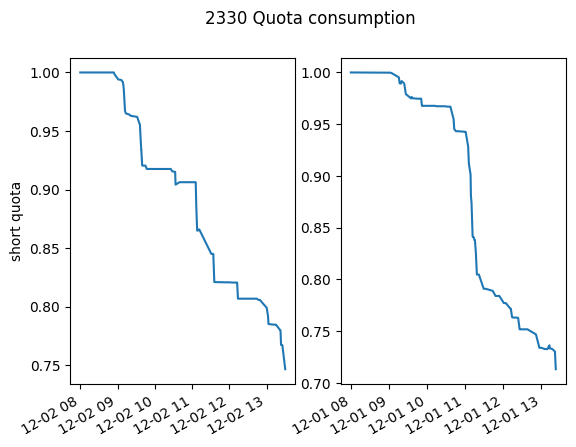

In [109]:
# Plotting the stock quota
plt.subplot(1,2,1)
start_date = '2022-12-02'
end_date = start_date
stkno_list = ['2330']
df_temp = get_data(stkno_list=stkno_list, start_date=start_date, end_date=end_date, data=df_pct_hour_dt)
plt.plot(df_temp['new_txtime'], df_temp['pct_of_open'])
plt.ylabel('short quota')
plt.subplot(1,2,2)
start_date = '2022-12-01'
end_date = start_date
df_temp = get_data(stkno_list=stkno_list, start_date=start_date, end_date=end_date, data=df_pct_hour_dt)
plt.plot(df_temp['new_txtime'], df_temp['pct_of_open'])
plt.suptitle(f"{stkno_list[0]} Quota consumption")
plt.gcf().autofmt_xdate()

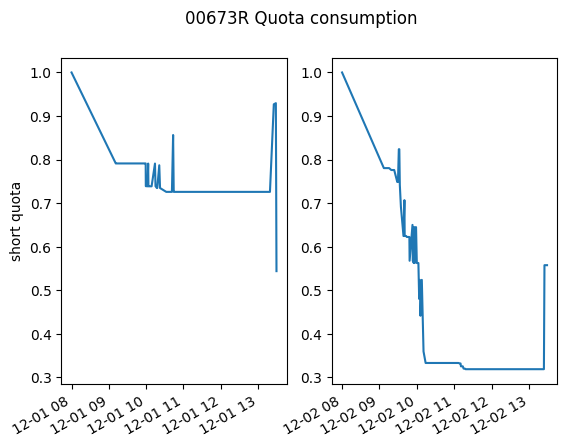

In [118]:
# Plotting the stock quota
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
start_date = '2022-12-01'
end_date = start_date
stkno_list = ['00673R']
df_temp = get_data(stkno_list=stkno_list, start_date=start_date, end_date=end_date, data=df_pct_hour_dt)
plt.plot(df_temp['new_txtime'], df_temp['pct_of_open'])
plt.ylabel('short quota')
ax2 = fig.add_subplot(1,2,2, sharey=ax1)
start_date = '2022-12-02'
end_date = start_date
df_temp = get_data(stkno_list=stkno_list, start_date=start_date, end_date=end_date, data=df_pct_hour_dt)
plt.plot(df_temp['new_txtime'], df_temp['pct_of_open'])
plt.suptitle(f"{stkno_list[0]} Quota consumption")
plt.gcf().autofmt_xdate()

In [39]:
df_pct_hour_dt['intime'] = df_pct_hour_dt['new_txtime'].apply(lambda x: str(x.time())[:8].replace(':','')).astype(int)
df_pct_hour_dt

,request_date,stkno,request_time,txtime,slblimit,ts,pct_of_open,new_txtime,intime
0,2022-11-29,0051,08:53:12.717576,,4215,0,1.000000,2022-11-29 08:00:00.000,80000
1,2022-11-29,0052,08:53:12.717576,,37004,0,1.000000,2022-11-29 08:00:00.000,80000
2,2022-11-29,0052,09:00:25.390449,08:59:59.65,37004,8595965,1.000000,2022-11-29 08:59:59.650,85959
3,2022-11-29,0052,09:01:28.784991,09:01:05.74,29004,9010574,0.783807,2022-11-29 09:01:05.740,90105
4,2022-11-29,0052,09:02:26.160528,09:01:51.67,25004,9015167,0.675711,2022-11-29 09:01:51.670,90151
...,...,...,...,...,...,...,...,...,...
58555,2022-12-02,9958,13:06:37.482952,13:05:26.72,297855,13052672,0.805329,2022-12-02 13:05:26.720,130526
58556,2022-12-02,9958,13:22:35.802867,13:22:11.34,284855,13221134,0.770180,2022-12-02 13:22:11.340,132211
58557,2022-12-02,9958,13:30:33.101219,13:29:59.81,283855,13295981,0.767476,2022-12-02 13:29:59.810,132959
58558,2022-12-02,9960,08:51:11.240436,,7636,0,1.000000,2022-12-02 08:00:00.000,80000


In [120]:
def plot_quota_consumption(stkno_list, date_list, data):
    fig = plt.figure()
    rows = len(stkno_list) // 2 + 1
    cols = 2 if len(stkno_list) > 1 else 1
    
    for idx, stkno in enumerate(stkno_list):
        ax1 = fig.add_subplot(rows, cols, idx + 1)
        for date in date_list:
            df_temp = get_data(stkno_list=[stkno], start_date=date, end_date=date, data=data)
            plt.plot(df_temp['intime'], df_temp['pct_of_open'])
        plt.title(f"{stkno}")
    plt.subplots_adjust(hspace=0.15*len(stkno_list))
    

In [57]:
# Overall market short ratio at time point
date_sr = {}
for date in df_pct_hour_dt['request_date'].unique():
    df_hour = df_pct_hour_dt.query("request_date == @date")
    date_sr[date] = {}
    for i in range(len(hour_list)-1):
        start_time = hour_list[i]
        end_time = hour_list[i+1]
        df_temp = df_hour.query("txtime >= @start_time & txtime < @end_time")
        df_temp = df_temp.sort_values(['stkno', 'intime']).drop_duplicates(subset='stkno', keep='last')
        overall_sr = df_temp['pct_of_open'].mean()
        # print(date, start_time, '-', end_time, df_temp.shape)
        date_sr[date][end_time] = overall_sr
        # print(start_time, '-', end_time, total_turnover)
        # print('-'*50)

Text(0.5, 1.0, 'Average Overall Short Quota Usage')

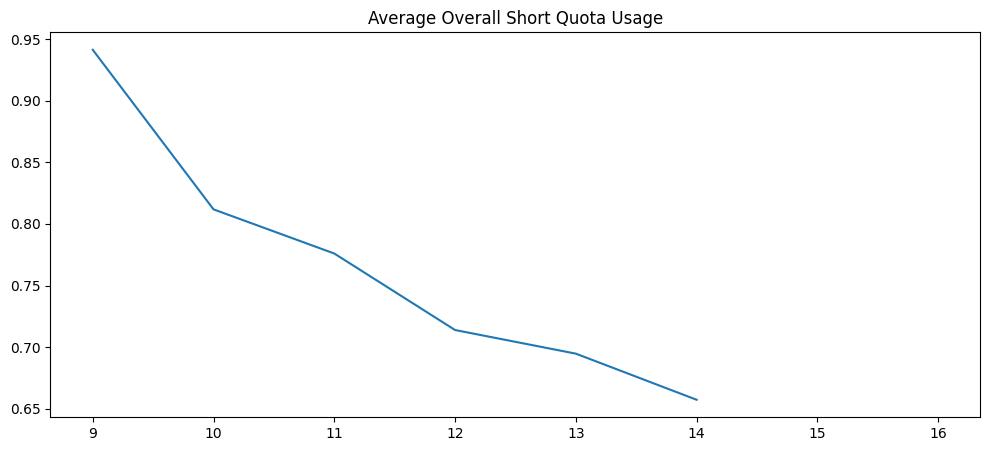

In [76]:
df_valid_sr_mean = pd.DataFrame.from_dict(date_sr)['2022-12-02']
plt.figure(figsize=(12, 5))
plt.plot(range(9, 9+len(df_valid_sr_mean)), df_valid_sr_mean)
plt.title('Average Overall Short Quota Usage')

Text(0.5, 1.0, 'Average Overall Short Quota Usage')

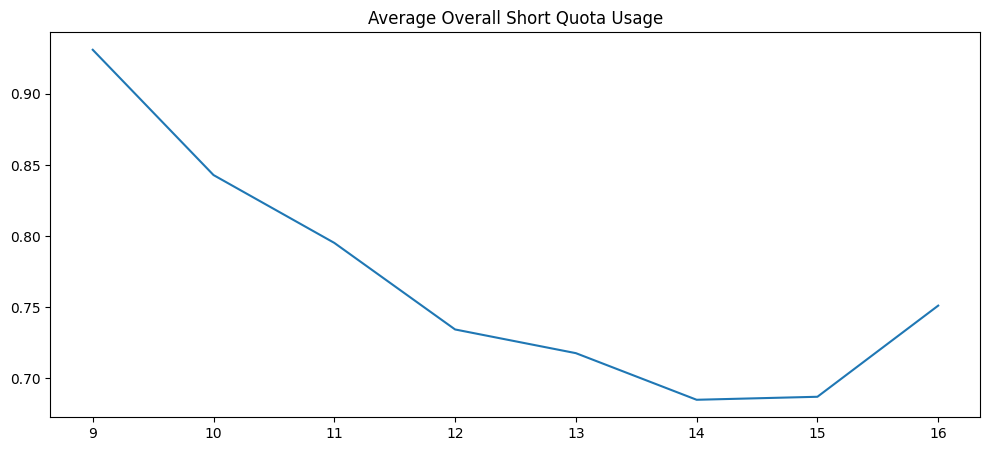

In [73]:
df_valid_sr_mean = pd.DataFrame.from_dict(date_sr).mean(axis=1)
plt.figure(figsize=(12, 5))
plt.plot(range(9, 9+len(df_valid_sr_mean)), df_valid_sr_mean)
plt.title('Average Overall Short Quota Usage')

In [134]:
ava_stk_list = []
valid_stk_list = df_pct_hour_dt['stkno'].unique()
for stk in most_traded_stks:
    if stk in valid_stk_list:
        ava_stk_list.append(stk)
ava_stk_list

['00632R', '00637L', '1605', '3481', '00878', '0056', '2330', '00673R', '2891']

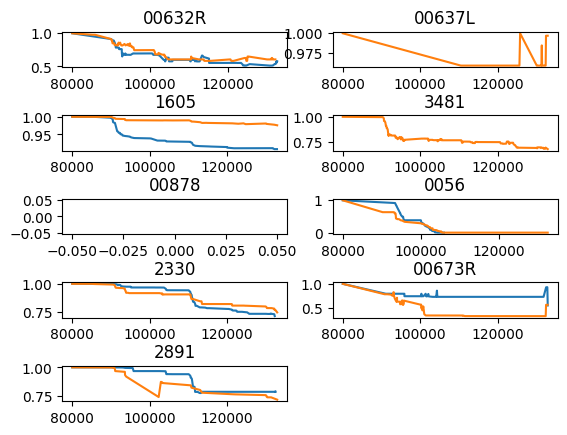

In [135]:
plot_quota_consumption(ava_stk_list, ['2022-12-01', '2022-12-02'], df_pct_hour_dt)

Text(0.5, 1.0, '1605.TW Quota Usage')

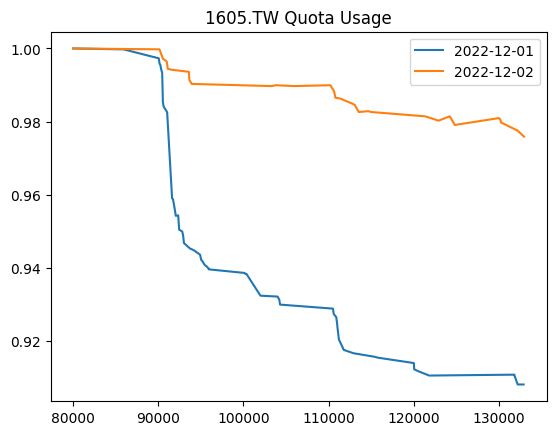

In [133]:
plot_quota_consumption(['1605'], ['2022-12-01', '2022-12-02'], df_pct_hour_dt)
plt.legend(['2022-12-01', '2022-12-02'])
plt.title(f"{1605}.TW Quota Usage")

Text(0.5, 0, 'Time (h:mm:ss)')

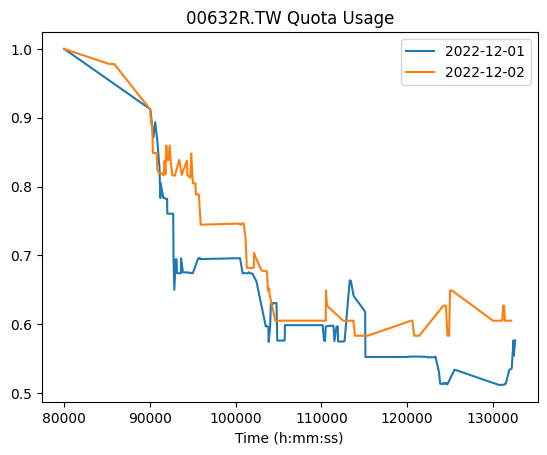

In [145]:
my_list = ['00632R']
plot_quota_consumption(my_list, ['2022-12-01', '2022-12-02'], df_pct_hour_dt)
plt.legend(['2022-12-01', '2022-12-02'])
plt.title(f"{my_list[0]}.TW Quota Usage")
plt.xlabel('Time (h:mm:ss)')

Text(0.5, 0, 'Time (h:mm:ss)')

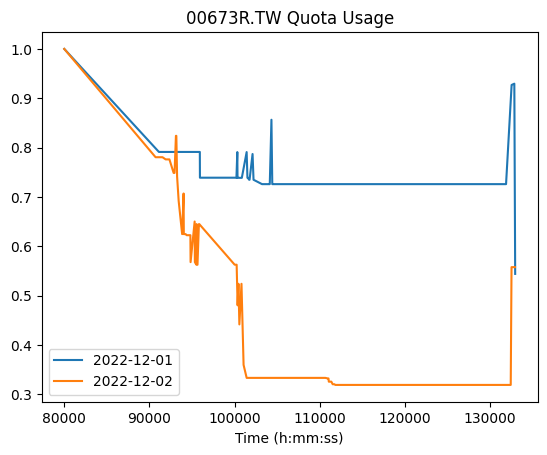

In [144]:
my_list = ['00673R']
plot_quota_consumption(my_list, ['2022-12-01', '2022-12-02'], df_pct_hour_dt)
plt.legend(['2022-12-01', '2022-12-02'])
plt.title(f"{my_list[0]}.TW Quota Usage")
plt.xlabel('Time (h:mm:ss)')

Text(0.5, 0, 'Time (h:mm:ss)')

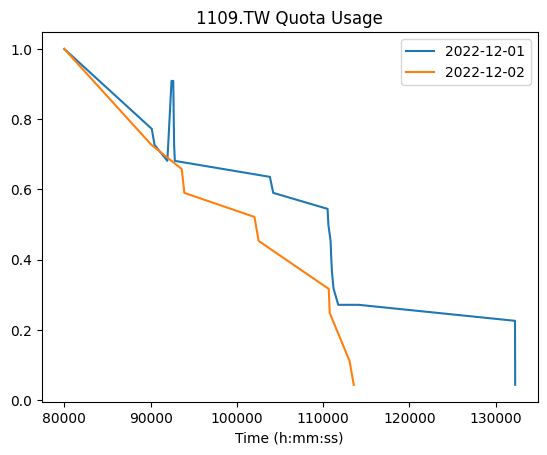

In [161]:
my_list = ['1109']
date_list = ['2022-12-01', '2022-12-02']
plot_quota_consumption(my_list, date_list, df_pct_hour_dt)
plt.legend(date_list)
plt.title(f"{my_list[0]}.TW Quota Usage")
plt.xlabel('Time (h:mm:ss)')

In [153]:
df_pct_hour_dt.query("0.95 < pct_of_open < 1 & intime > 100000")

,request_date,stkno,request_time,txtime,slblimit,ts,pct_of_open,new_txtime,intime
2811,2022-11-29,00902,10:47:35.199954,10:46:22.76,552650,10462276,0.989260,2022-11-29 10:46:22.760,104622
2812,2022-11-29,00902,10:48:34.814411,10:48:09.08,542650,10480908,0.971360,2022-11-29 10:48:09.080,104809
2814,2022-11-29,00902,13:28:40.712057,13:28:06.50,542650,13280650,0.971360,2022-11-29 13:28:06.500,132806
2839,2022-11-29,1108,13:23:35.942490,13:22:33.99,20392,13223399,0.953254,2022-11-29 13:22:33.990,132233
2841,2022-11-29,1109,13:23:35.942490,13:22:45.89,20380,13224589,0.953227,2022-11-29 13:22:45.890,132245
...,...,...,...,...,...,...,...,...,...
58171,2022-12-02,9919,13:03:42.023955,13:02:39.00,687977,13023900,0.973125,2022-12-02 13:02:39.000,130239
58172,2022-12-02,9919,13:22:35.802867,13:22:12.84,686977,13221284,0.971711,2022-12-02 13:22:12.840,132212
58173,2022-12-02,9919,13:23:41.660845,13:23:08.78,684977,13230878,0.968882,2022-12-02 13:23:08.780,132308
58174,2022-12-02,9919,13:24:46.178524,13:24:08.59,686977,13240859,0.971711,2022-12-02 13:24:08.590,132408


In [162]:
get_data(['0050'], '2022-11-29', '2022-11-29', df_pct_hour)

,request_date,stkno,request_time,txtime,slblimit,ts,pct_of_open


In [313]:
get_quota_used(['2609'])

request_date  stkno
2022-11-29    2609    -0.999841
2022-11-30    2609    -0.999915
2022-12-01    2609    -0.999851
2022-12-02    2609    -0.966953
dtype: float64